/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


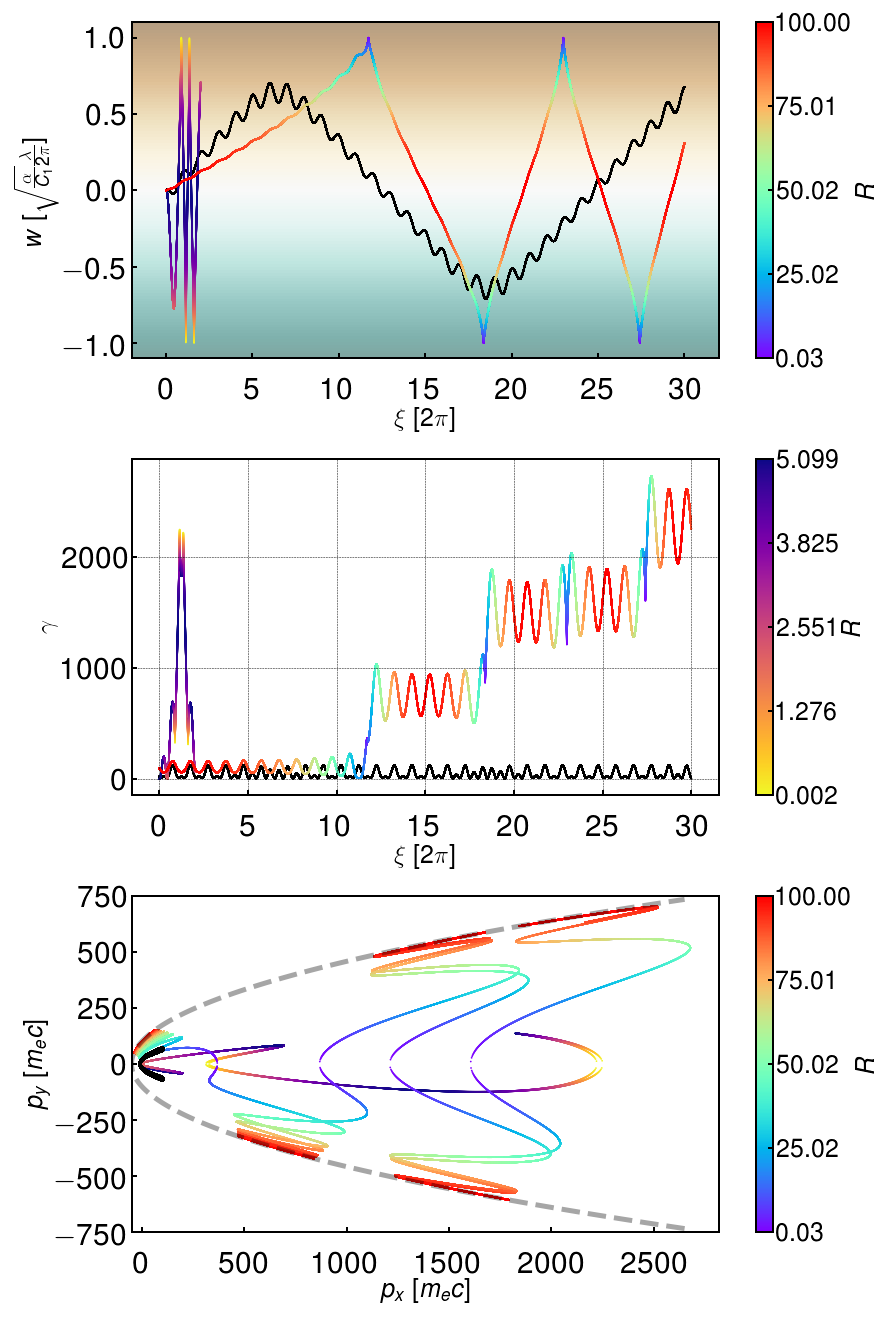

In [48]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

font = {'family' : 'Helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

alpha=0.01
# initial condition
P1=25.0
alpha1=0.01
C1=(P1**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha1/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1]
    
t1=t
w1=w
R1=C1-alpha1*w1**2*C1/alpha1   
py1=u*R1*(C1/alpha1)**0.5
gamma1=(1+py1**2+R1**2)/2/R1
px1=gamma1-R1
q1=w1*(C1/alpha1)**0.5
d_work1=py1/R1*a1

# initial condition
P2=5.0
alpha2=0.01
C1=(P2**2+1.0)**0.5
#z0 = [0,0]
z2 = [(alpha2/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u2 = np.empty_like(t)
w2 = np.empty_like(t)
# record initial conditions
u2[0] = z2[0]
w2[0] = z2[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z2,tspan,args=(a0[i],))
    # store solution for plotting
    u2[i] = z[1][0]
    w2[i] = z[1][1]
    # next initial condition
    z2 = z[1]
    
t2=t
w2=w2
R2=C1-alpha2*w2**2*C1/alpha2   
py2=u2*R2*(C1/alpha2)**0.5
gamma2=(1+py2**2+R2**2)/2/R2
px2=gamma2-R2
q2=w2*(C1/alpha2)**0.5
d_work2=py2/R2*a2

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1]


R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5
gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5
d_work=py/R*a0


n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
n_min2=0 # 104999 #99999# 74999 #35000
n_max2=19999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
lgR1=R1[n_min:n_max]
lgR2=R2[n_min2:n_max2]
#lgR=np.log10(R[n_min:n_max])
# plot results

plt.subplot(3,1,1)
x_grid = np.linspace(-2.0,32.0,401)
y_grid = np.linspace(-1.2,1.2,401)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Bz = -2*alpha*y_grid*(alpha*P0)**0.5
eee=np.max([-np.min(Bz),np.max(Bz)])
levels = np.linspace(-eee, eee, 128)
plt.contourf(x_grid, y_grid, Bz, levels=levels, cmap=cm.BrBG, alpha=.5)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        

plt.scatter(t1[n_min:n_max]/2/np.pi,w1[n_min:n_max], s=3, color='k', edgecolors='None')
plt.scatter(t2[n_min2:n_max2]/2/np.pi,w2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

ax=plt.subplot(3,1,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t1[n_min:n_max]/2/np.pi,gamma1[n_min:n_max], s=3, color='k', edgecolors='None')
plt.scatter(t2[n_min2:n_max2]/2/np.pi,gamma2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR2), np.max(lgR2), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')

#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,1,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
p_py = np.linspace(-750.0,750.0,401)
p_px = np.linspace(-50.0,2650.0,601)

[p_px,p_py] = np.meshgrid(p_px,p_py)

p_R = (1+p_px**2+p_py**2)**0.5-p_px
levels = np.linspace(np.min(p_R), np.max(p_R), 32)
plt.contour(p_px, p_py, p_R, np.array([100.0]),linestyles='dashed',linewidth=0.5, alpha=0.35)
plt.scatter(px2[n_min2:n_max2],py2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.scatter(px1[n_min:n_max],py1[n_min:n_max], s=3, color='k', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))

#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x\ [m_ec]$',fontdict=font)
plt.ylabel(r'$p_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.30, wspace=0.10)


#plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 20)
#fig.set_size_inches(5, 4.5)
fig.savefig('./story_com_1.png',format='png',dpi=480)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


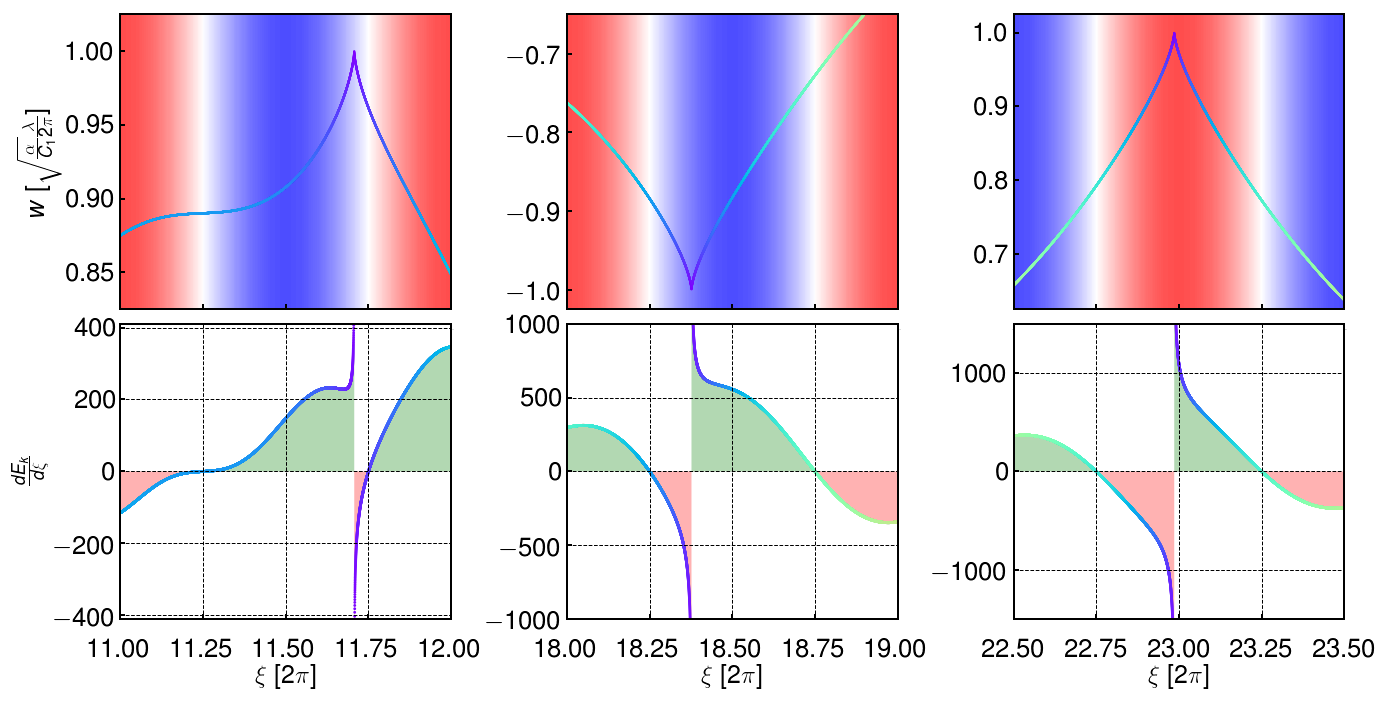

In [39]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(0,30.0,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)



ax=plt.subplot(2,3,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
plt.ylim(0.825,1.025)
plt.xlim(11.0,12.0)
plt.legend(loc='best')

ax=plt.subplot(2,3,2)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
plt.ylim(-1.025,-0.65)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(2,3,3)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
plt.ylim(0.625,1.025)
plt.xlim(22.5,23.5)
plt.legend(loc='best')

ax=plt.subplot(2,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=26); plt.yticks(fontsize=26);
plt.ylim(-409.9,409.9)
plt.xlim(11.0,12.0)
plt.legend(loc='best')

ax=plt.subplot(2,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=179999
#n_max=189999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=26); plt.yticks(fontsize=26);
plt.ylim(-1000.1,1000.1)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(2,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=224999
#n_max=234999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=26); plt.yticks(fontsize=26);
plt.ylim(-1500.1,1500.1)
plt.xlim(22.5,23.5)
plt.legend(loc='best')

#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05, wspace=0.35)
fig = plt.gcf()
fig.set_size_inches(20, 10)
#fig.set_size_inches(5, 4.5)
fig.savefig('./story_com_2_s.png',format='png',dpi=480)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


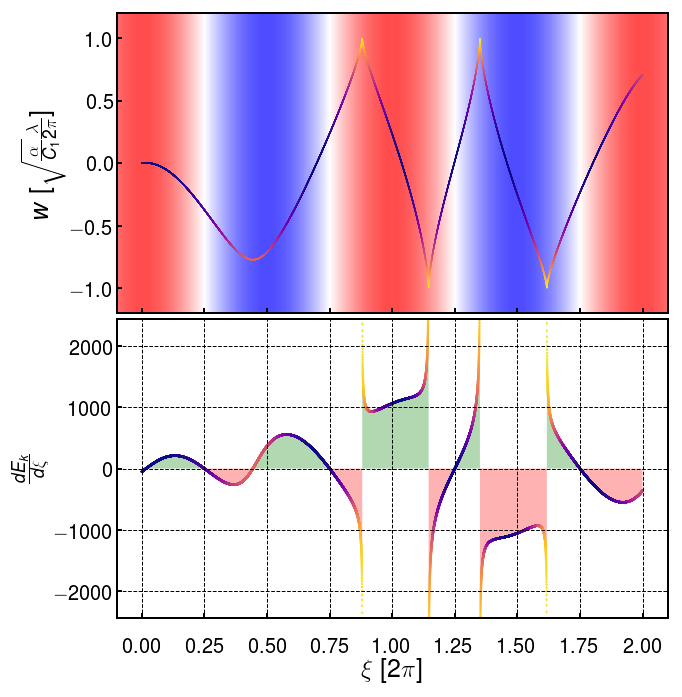

In [27]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://gist.github.com/danielballan/be066529de85e87a5fe7/raw')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

font = {'family' : 'Helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=5.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=19999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(-0.1,2.1,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)



plt.subplot(2,1,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
#plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=2, cmap='plasma_r' , edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
#plt.xticks(fontsize=20); 
plt.yticks(fontsize=20);
#plt.ylim(0.825,1.025)
plt.xlim(-0.10,2.10)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=0#109999
#n_max=19999#119999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],  c=lgR, s=2, cmap='plasma_r')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
#plt.xticks(fontsize=20); 
plt.yticks(fontsize=20);
plt.ylim(-2450,2450)
plt.xlim(-0.10,2.10)
plt.legend(loc='best')

#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.50)
fig = plt.gcf()
fig.set_size_inches(9, 10)
#fig.set_size_inches(5, 4.5)
fig.savefig('./story_com_3_s.png',format='png',dpi=480)
#plt.close("all")

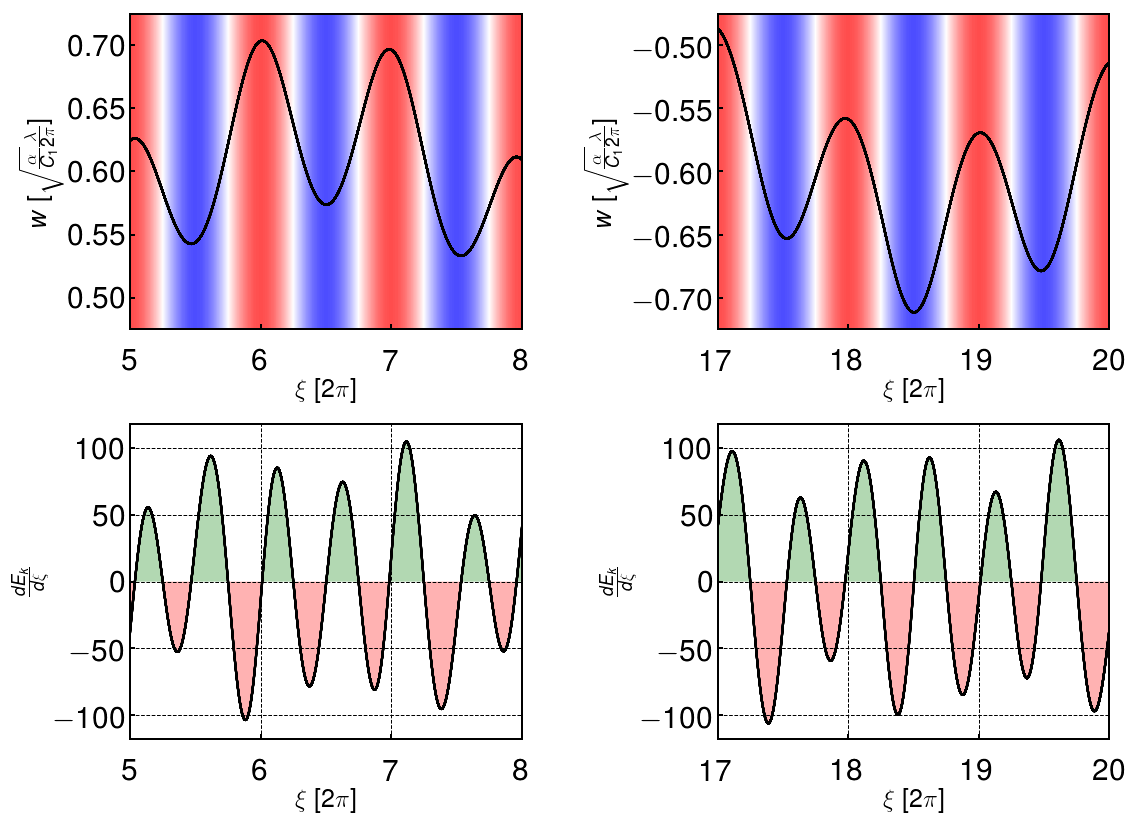

In [2]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=25.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(0,30.0,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)



ax=plt.subplot(2,2,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max],  s=5, color='k', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.ylim(0.475,0.725)
plt.xlim(5.0,8.0)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max],  s=5, color='k', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.ylim(-0.725,-.475)
plt.xlim(17.0,20.0)
plt.legend(loc='best')

ax=plt.subplot(2,2,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],  s=5, color='k', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0.025,1.025)
plt.xlim(5.0,8.0)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=179999
#n_max=189999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], s=5, color='k', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(-1000.1,1000.1)
plt.xlim(17.0,20.0)
plt.legend(loc='best')

#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.30, wspace=0.50)
fig = plt.gcf()
fig.set_size_inches(16, 12)
#fig.set_size_inches(5, 4.5)
fig.savefig('./story_com_4.png',format='png',dpi=480)
#plt.close("all")

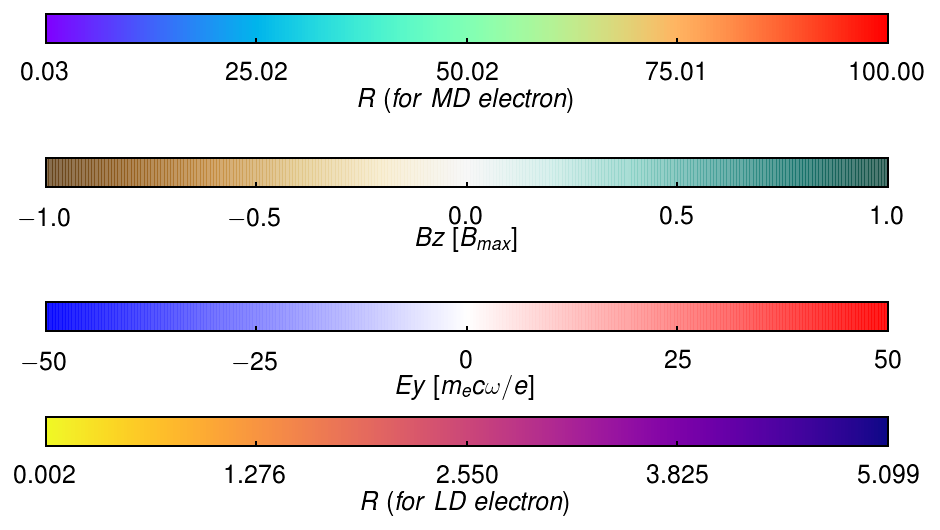

In [1]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_axes([0.05, 0.75, 0.9, 0.05])
ax2 = fig.add_axes([0.05, 0.50, 0.9, 0.05])
ax3 = fig.add_axes([0.05, 0.25, 0.9, 0.05])
ax4 = fig.add_axes([0.05, 0.05, 0.9, 0.05])



# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.rainbow
norm = mpl.colors.Normalize(vmin=0.03, vmax=100)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(0.03, 100, 5))
cb1.set_label(r'$R\ (for\ MD\ electron)$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.plasma_r
norm = mpl.colors.Normalize(vmin=0.002, vmax=5.099)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb4 = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(0.002, 5.099, 5))
cb4.set_label(r'$R\ (for\ LD\ electron)$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')




# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.BrBG
Bz = -2*1*(1.0)**0.5/2
norm = mpl.colors.Normalize(vmin=-abs(Bz), vmax=abs(Bz))
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(-abs(Bz), abs(Bz), 5),alpha=0.7)
cb2.set_label(r'$Bz\ [B_{max}]$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.bwr
a0=50
norm = mpl.colors.Normalize(vmin=-abs(a0), vmax=abs(a0))
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',ticks=np.linspace(-abs(a0), abs(a0), 5),alpha=0.9)
cb3.set_label(r'$Ey\ [m_ec\omega/e]$')

# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap.set_over('0.25')
cmap.set_under('0.75')


fig = plt.gcf()
fig.set_size_inches(13, 8)
fig.savefig('./story_com_colorbar.png',format='png',dpi=480)
plt.show()

In [6]:
help(plt.grid)

Help on function grid in module matplotlib.pyplot:

grid(b=None, which='major', axis='both', **kwargs)
    Turn the axes grids on or off.
    
    Set the axes grids on or off; *b* is a boolean.  (For MATLAB
    compatibility, *b* may also be a string, 'on' or 'off'.)
    
    If *b* is *None* and ``len(kwargs)==0``, toggle the grid state.  If
    *kwargs* are supplied, it is assumed that you want a grid and *b*
    is thus set to *True*.
    
    *which* can be 'major' (default), 'minor', or 'both' to control
    whether major tick grids, minor tick grids, or both are affected.
    
    *axis* can be 'both' (default), 'x', or 'y' to control which
    set of gridlines are drawn.
    
    *kwargs* are used to set the grid line properties, e.g.,::
    
       ax.grid(color='r', linestyle='-', linewidth=2)
    
    Valid :class:`~matplotlib.lines.Line2D` kwargs are
    
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque) 
      animated: [True | False] 
     

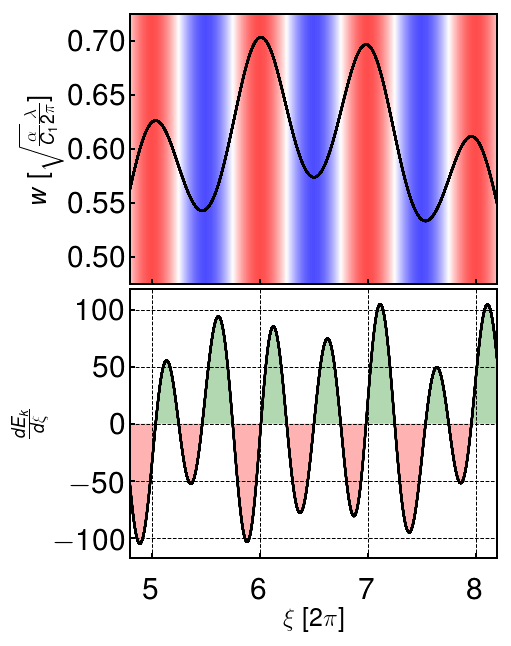

In [31]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=25.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(0,30.0,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)



ax=plt.subplot(2,1,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max],  s=5, color='k', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
#plt.xticks(fontsize=30); 
plt.yticks(fontsize=30);
plt.ylim(0.475,0.725)
plt.xlim(4.8,8.2)
plt.legend(loc='best')


ax=plt.subplot(2,1,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],  s=5, color='k', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(0.025,1.025)
plt.xlim(4.8,8.2)
plt.legend(loc='best')


#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.50)
fig = plt.gcf()
fig.set_size_inches(6, 9)
#fig.set_size_inches(5, 4.5)
fig.savefig('./story_com_4_s.png',format='png',dpi=480)
#plt.close("all")

In [14]:
4.6*50.0**0.667*0.01**0.3333

13.470100145828685

(-3.5, 0.5)

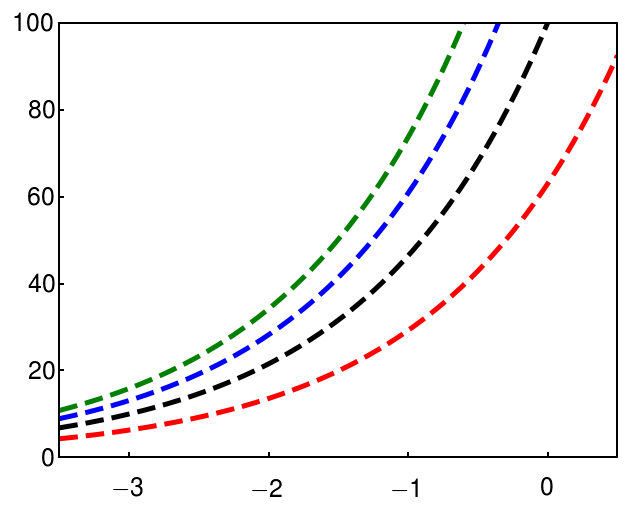

In [11]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x=np.linspace(-3.5,0.5,501)
a0=50.0
y=(10.0**x*(a0/0.1)**2)**0.3333
plt.plot(x,y,'--r')
a0=100.0
y=(10.0**x*(a0/0.1)**2)**0.3333
plt.plot(x,y,'--k')
a0=150.0
y=(10.0**x*(a0/0.1)**2)**0.3333
plt.plot(x,y,'--b')
a0=200.0
y=(10.0**x*(a0/0.1)**2)**0.3333
plt.plot(x,y,'--g')
plt.ylim(0,100)
plt.xlim(-3.5,0.5)

In [12]:
10.0**0.6667

4.64194510239346

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


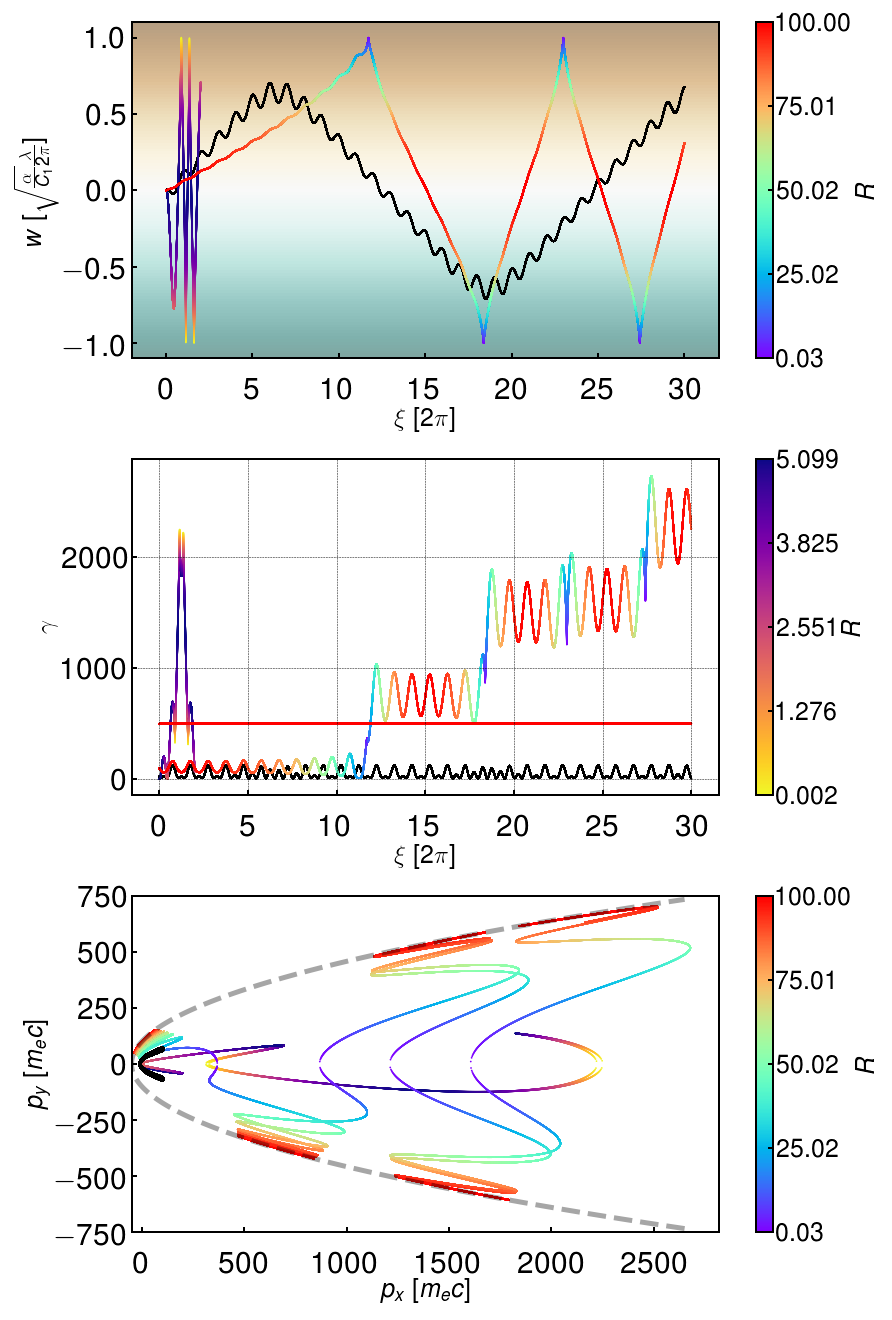

In [20]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

font = {'family' : 'Helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

alpha=0.01
# initial condition
P1=25.0
alpha1=0.01
C1=(P1**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha1/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1]
    
t1=t
w1=w
R1=C1-alpha1*w1**2*C1/alpha1   
py1=u*R1*(C1/alpha1)**0.5
gamma1=(1+py1**2+R1**2)/2/R1
px1=gamma1-R1
q1=w1*(C1/alpha1)**0.5
d_work1=py1/R1*a0

# initial condition
P2=5.0
alpha2=0.01
C1=(P2**2+1.0)**0.5
#z0 = [0,0]
z2 = [(alpha2/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u2 = np.empty_like(t)
w2 = np.empty_like(t)
# record initial conditions
u2[0] = z2[0]
w2[0] = z2[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z2,tspan,args=(a0[i],))
    # store solution for plotting
    u2[i] = z[1][0]
    w2[i] = z[1][1]
    # next initial condition
    z2 = z[1]
    
t2=t
w2=w2
R2=C1-alpha2*w2**2*C1/alpha2   
py2=u2*R2*(C1/alpha2)**0.5
gamma2=(1+py2**2+R2**2)/2/R2
px2=gamma2-R2
q2=w2*(C1/alpha2)**0.5
d_work2=py2/R2*a0

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1]


R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5
gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5
d_work=py/R*a0


n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
n_min2=0 # 104999 #99999# 74999 #35000
n_max2=19999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
lgR1=R1[n_min:n_max]
lgR2=R2[n_min2:n_max2]
#lgR=np.log10(R[n_min:n_max])
# plot results

plt.subplot(3,1,1)
x_grid = np.linspace(-2.0,32.0,401)
y_grid = np.linspace(-1.2,1.2,401)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Bz = -2*alpha*y_grid*(alpha*P0)**0.5
eee=np.max([-np.min(Bz),np.max(Bz)])
levels = np.linspace(-eee, eee, 128)
plt.contourf(x_grid, y_grid, Bz, levels=levels, cmap=cm.BrBG, alpha=.5)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        

plt.scatter(t1[n_min:n_max]/2/np.pi,w1[n_min:n_max], s=3, color='k', edgecolors='None')
plt.scatter(t2[n_min2:n_max2]/2/np.pi,w2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
plt.ylim(-1.1,1.1)
plt.legend(loc='best')

ax=plt.subplot(3,1,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t1[n_min:n_max]/2/np.pi,gamma1[n_min:n_max], s=3, color='k', edgecolors='None')
plt.scatter(t2[n_min2:n_max2]/2/np.pi,gamma2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR2), np.max(lgR2), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
z=np.empty_like(t)
z=50.0**2/5.0+0*t
plt.scatter(t[n_min:n_max]/2/np.pi, z[n_min:n_max], s=3, color='r', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')

#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplot(3,1,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(px,py,'g-',label=r'$p_x-p_y$')
p_py = np.linspace(-750.0,750.0,401)
p_px = np.linspace(-50.0,2650.0,601)

[p_px,p_py] = np.meshgrid(p_px,p_py)

p_R = (1+p_px**2+p_py**2)**0.5-p_px
levels = np.linspace(np.min(p_R), np.max(p_R), 32)
plt.contour(p_px, p_py, p_R, np.array([100.0]),linestyles='dashed',linewidth=0.5, alpha=0.35)
plt.scatter(px2[n_min2:n_max2],py2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
plt.scatter(px1[n_min:n_max],py1[n_min:n_max], s=3, color='k', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))

#cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$p_x\ [m_ec]$',fontdict=font)
plt.ylabel(r'$p_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=30); plt.yticks(fontsize=30);
#plt.ylim(-1.1,1.1)
plt.legend(loc='best')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.30, wspace=0.10)


#plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 20)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./story_com_1.png',format='png',dpi=480)
#plt.close("all")

In [ ]:
1.37*3.14

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


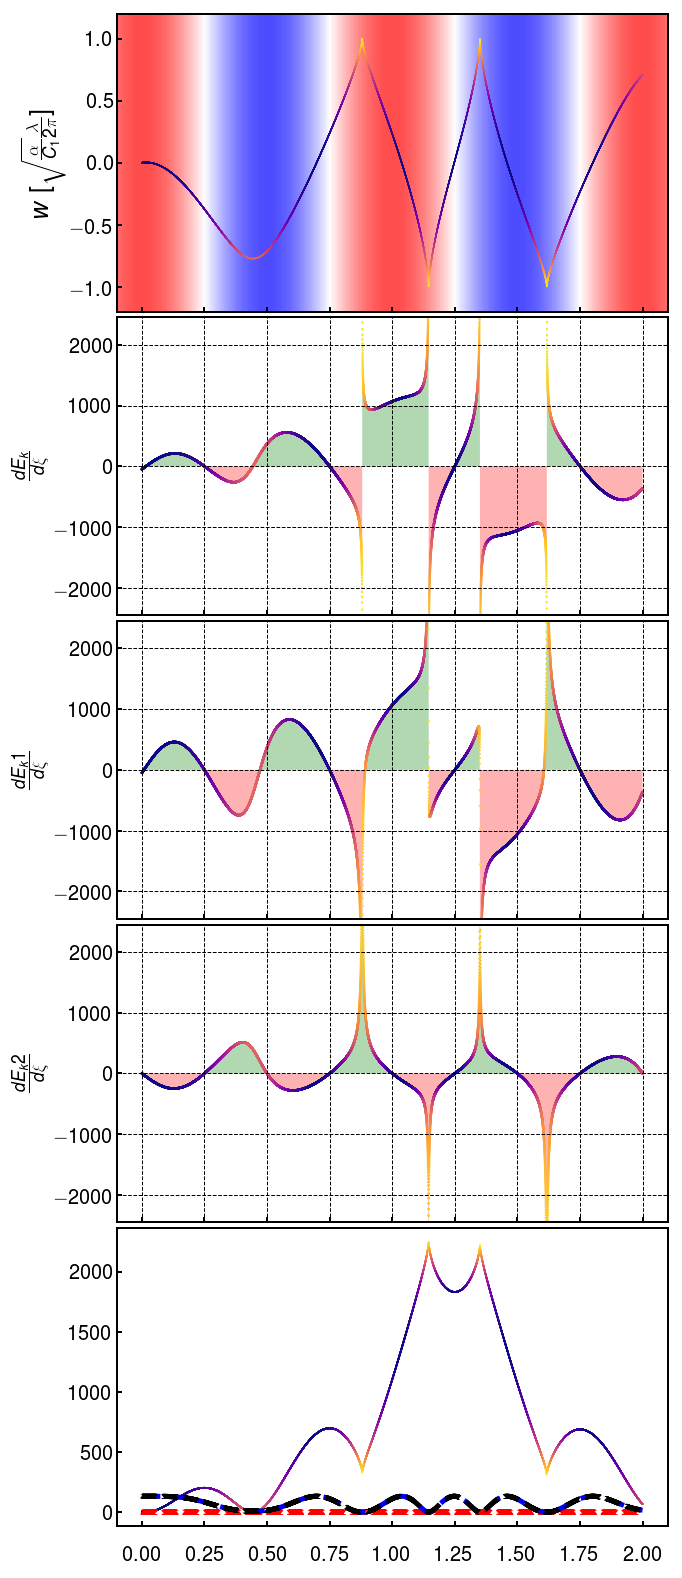

In [21]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://gist.github.com/danielballan/be066529de85e87a5fe7/raw')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

font = {'family' : 'Helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=5.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=200000

# time points
t = np.linspace(0,20*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0
d_work1=(py-50.0*np.sin(t))/R*a0
d_work2=50.0*np.sin(t)/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=19999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(-0.1,2.1,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)


g_work  = np.empty_like(t)
g_work1 = np.empty_like(t)
g_work2 = np.empty_like(t)

#for i in range(1,nsteps):
#    g_work[i-1]=sum(d_work[:i])
#    g_work1[i-1]=sum(d_work1[:i])
#    g_work2[i-1]=sum(d_work2[:i])


plt.subplot(5,1,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
#plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=2, cmap='plasma_r' , edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
#plt.xticks(fontsize=20); 
plt.yticks(fontsize=20);
#plt.ylim(0.825,1.025)
plt.xlim(-0.10,2.10)
plt.legend(loc='best')

ax=plt.subplot(5,1,2)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=0#109999
#n_max=19999#119999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],  c=lgR, s=2, cmap='plasma_r')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
#plt.xticks(fontsize=20); 
plt.yticks(fontsize=20);
plt.ylim(-2450,2450)
plt.xlim(-0.10,2.10)
plt.legend(loc='best')

ax=plt.subplot(5,1,3)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=0#109999
#n_max=19999#119999
x1=t[n_min:n_max]/2/np.pi
y1=d_work1[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work1[n_min:n_max],  c=lgR, s=2, cmap='plasma_r')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k1}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
#plt.xticks(fontsize=20); 
plt.yticks(fontsize=20);
plt.ylim(-2450,2450)
plt.xlim(-0.10,2.10)
plt.legend(loc='best')

ax=plt.subplot(5,1,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=0#109999
#n_max=19999#119999
x1=t[n_min:n_max]/2/np.pi
y1=d_work2[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work2[n_min:n_max],  c=lgR, s=2, cmap='plasma_r')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k2}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
#plt.xticks(fontsize=20); 
plt.yticks(fontsize=20);
plt.ylim(-2450,2450)
plt.xlim(-0.10,2.10)
plt.legend(loc='best')

ax=plt.subplot(5,1,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=3, cmap='plasma_r', edgecolors='None')
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))

plt.plot(t[n_min:n_max]/2/np.pi,g_work1[n_min:n_max],'--r')
plt.plot(t[n_min:n_max]/2/np.pi,g_work2[n_min:n_max],'--b')
plt.plot(t[n_min:n_max]/2/np.pi,g_work1[n_min:n_max]+g_work2[n_min:n_max],'--k')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
plt.xlim(-0.10,2.10)

#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.02, wspace=0.50)
fig = plt.gcf()
fig.set_size_inches(9, 25)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./story_com_3_s.png',format='png',dpi=480)
#plt.close("all")

In [15]:
x=np.linspace(1,100,100)
sum(x[:0])

0

In [13]:
x[99]

100.0

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


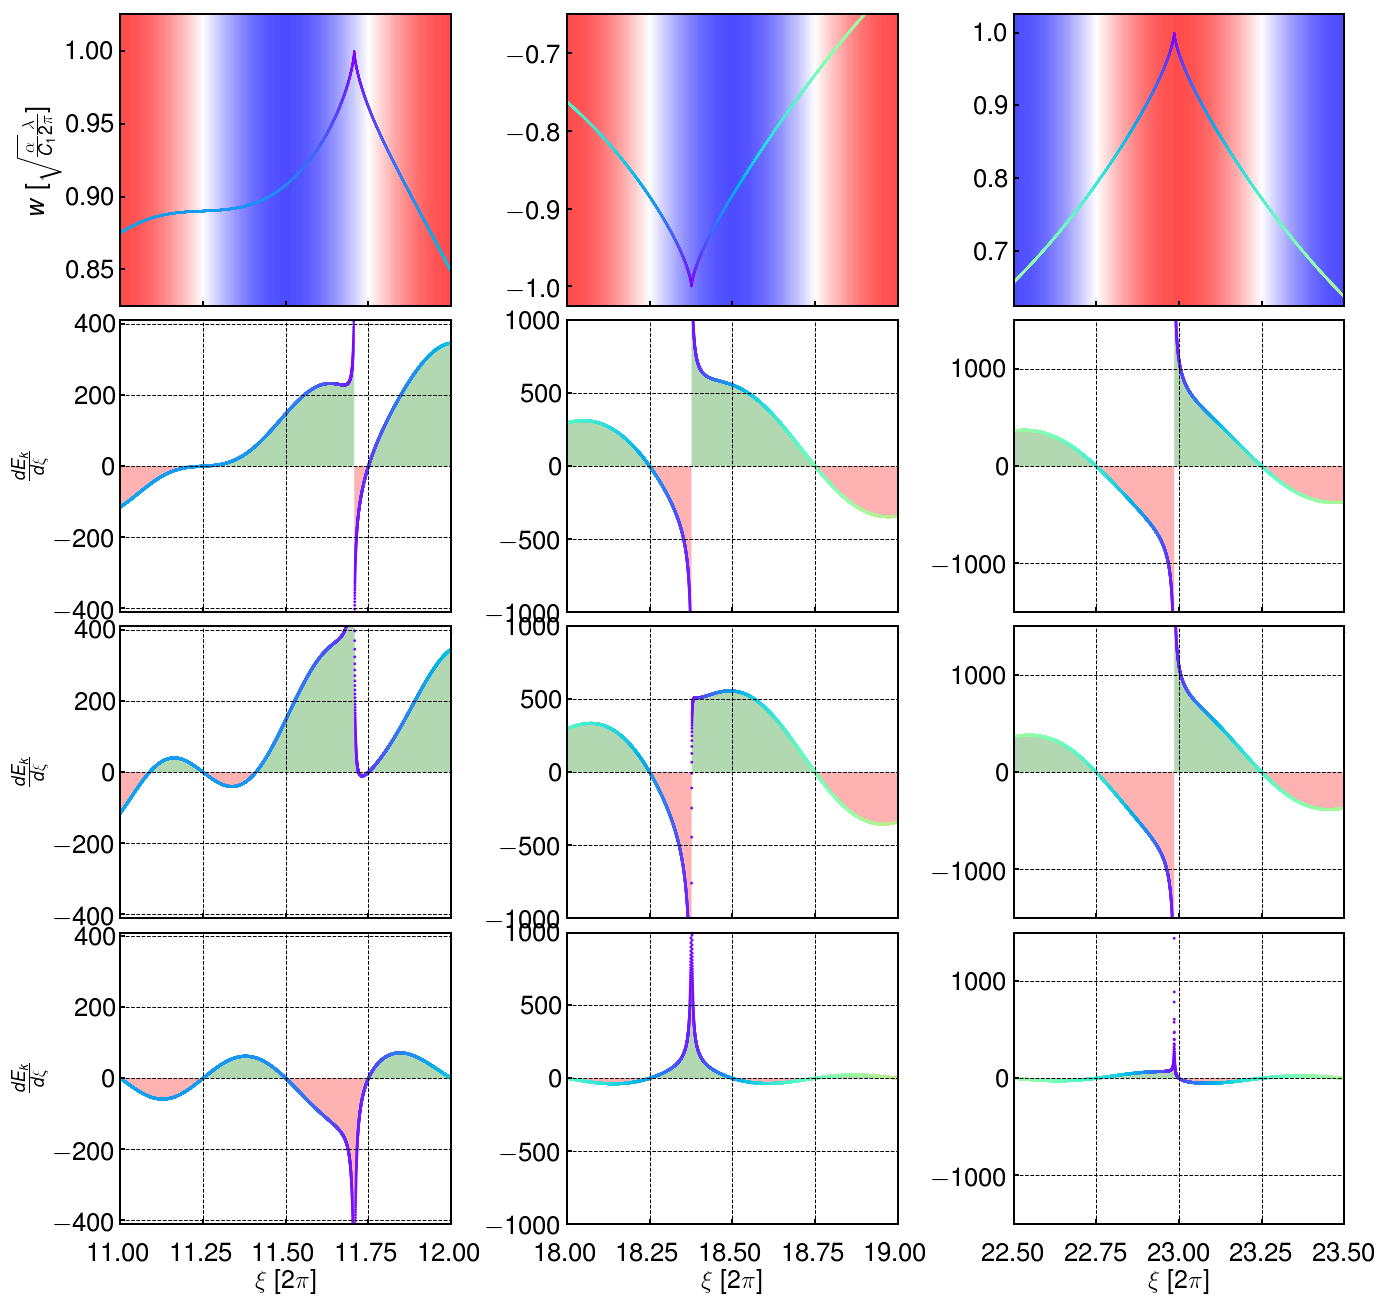

In [23]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0
d_work1=(py-50.0*np.sin(t))/R*a0
d_work2=50.0*np.sin(t)/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(0,30.0,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)



ax=plt.subplot(4,3,1)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
plt.ylim(0.825,1.025)
plt.xlim(11.0,12.0)
plt.legend(loc='best')

ax=plt.subplot(4,3,2)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
plt.ylim(-1.025,-0.65)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(4,3,3)
#### manifesting colorbar, changing label and axis properties ####
#cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
#cbar.set_label('Normalized electric field',fontdict=font)        
plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
plt.ylim(0.625,1.025)
plt.xlim(22.5,23.5)
plt.legend(loc='best')

ax=plt.subplot(4,3,4)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=1); plt.yticks(fontsize=26);
plt.ylim(-409.9,409.9)
plt.xlim(11.0,12.0)
plt.legend(loc='best')

ax=plt.subplot(4,3,5)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=179999
#n_max=189999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=1); plt.yticks(fontsize=26);
plt.ylim(-1000.1,1000.1)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(4,3,6)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=224999
#n_max=234999
x1=t[n_min:n_max]/2/np.pi
y1=d_work[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=1); plt.yticks(fontsize=26);
plt.ylim(-1500.1,1500.1)
plt.xlim(22.5,23.5)
plt.legend(loc='best')

ax=plt.subplot(4,3,7)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
x1=t[n_min:n_max]/2/np.pi
y1=d_work1[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work1[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=1); plt.yticks(fontsize=26);
plt.ylim(-409.9,409.9)
plt.xlim(11.0,12.0)
plt.legend(loc='best')


ax=plt.subplot(4,3,8)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=179999
#n_max=189999
x1=t[n_min:n_max]/2/np.pi
y1=d_work1[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work1[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=1); plt.yticks(fontsize=26);
plt.ylim(-1000.1,1000.1)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(4,3,9)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=224999
#n_max=234999
x1=t[n_min:n_max]/2/np.pi
y1=d_work1[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work1[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
#plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=1); plt.yticks(fontsize=26);
plt.ylim(-1500.1,1500.1)
plt.xlim(22.5,23.5)
plt.legend(loc='best')


ax=plt.subplot(4,3,10)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
x1=t[n_min:n_max]/2/np.pi
y1=d_work2[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
plt.scatter(t[n_min:n_max]/2/np.pi,d_work2[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=26); plt.yticks(fontsize=26);
plt.ylim(-409.9,409.9)
plt.xlim(11.0,12.0)
plt.legend(loc='best')


ax=plt.subplot(4,3,11)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=179999
#n_max=189999
x1=t[n_min:n_max]/2/np.pi
y1=d_work2[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work2[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=26); plt.yticks(fontsize=26);
plt.ylim(-1000.1,1000.1)
plt.xlim(18.0,19.0)
plt.legend(loc='best')

ax=plt.subplot(4,3,12)
#plt.plot(t,a0,'g:',label=r'$a_0(t)$')
#plt.plot(t,u,'b-',label='u(t)')
#plt.plot(t/2/np.pi,w,'r-',label='w(t)')
#n_min=224999
#n_max=234999
x1=t[n_min:n_max]/2/np.pi
y1=d_work2[n_min:n_max]
y2=np.zeros_like(x1)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
#ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
plt.scatter(t[n_min:n_max]/2/np.pi,d_work2[n_min:n_max], c=lgR, s=8, cmap='rainbow', edgecolors='None')
#plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
#plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
#cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
#cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
#plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.xticks(fontsize=26); plt.yticks(fontsize=26);
plt.ylim(-1500.1,1500.1)
plt.xlim(22.5,23.5)
plt.legend(loc='best')




#plt.show()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05, wspace=0.35)
fig = plt.gcf()
fig.set_size_inches(20, 20)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./story_com_2_s.png',format='png',dpi=480)
#plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


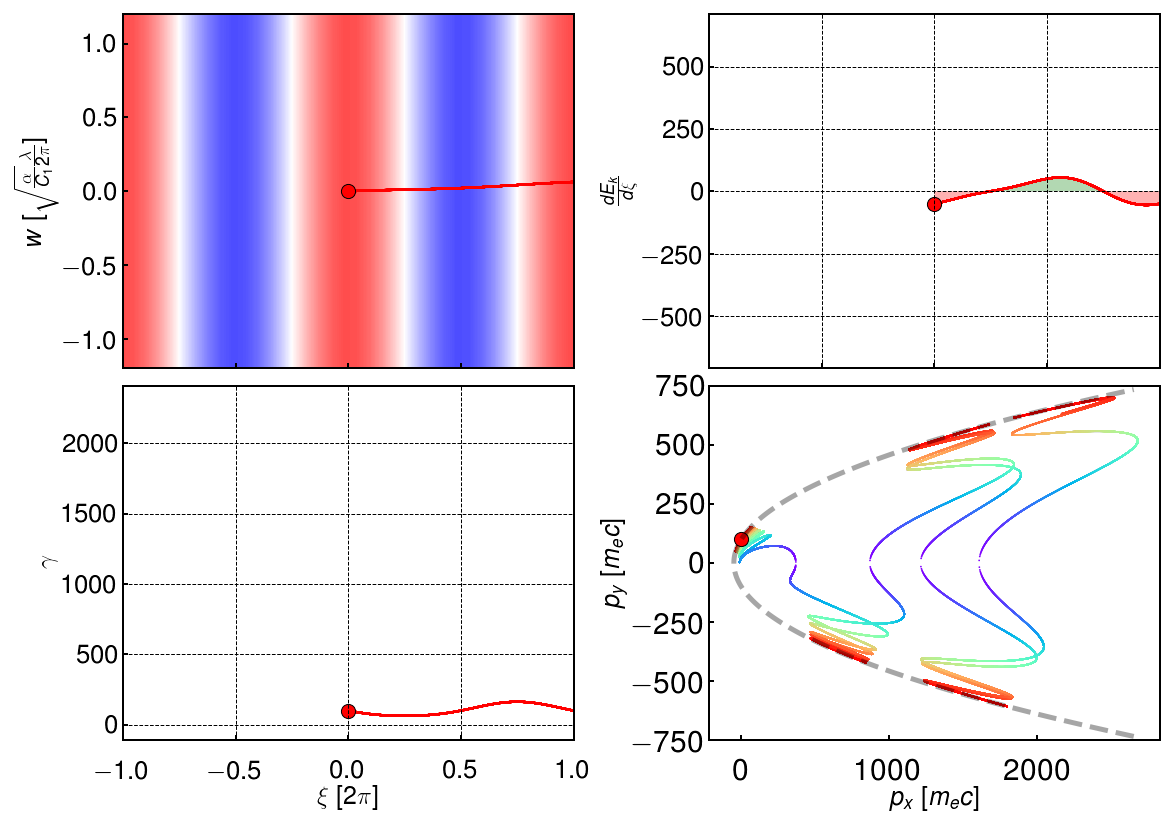

In [44]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(-1.5,31.5,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)

length_x = 2.0

for n_snap in range(0, 20000, 20001):


        start_x = -1.0+(t[-1]-t[-2])*n_snap/2/np.pi


        ax=plt.subplot(2,2,1)
        #### manifesting colorbar, changing label and axis properties ####
        #cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
        #cbar.set_label('Normalized electric field',fontdict=font)        
        plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
        plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,w[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
        plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
        #plt.ylim(0.825,1.025)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')


        ax=plt.subplot(2,2,2)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,w,'r-',label='w(t)')
        n_min=0 # 104999 #99999# 74999 #35000
        n_max=299999 # 124999 #5000 #399999
        x1=t[n_min:n_max]/2/np.pi
        y1=d_work[n_min:n_max]
        y2=np.zeros_like(x1)
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        #ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
        ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
        ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
        #ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
        #plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,d_work[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=1); plt.yticks(fontsize=26);
        plt.ylim(-709.9,709.9)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')

        ax=plt.subplot(2,2,3)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
        plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,gamma[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\gamma$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=26); plt.yticks(fontsize=26);
        #plt.ylim(-1.1,1.1)
        plt.ylim(-109.0, 2409.0)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')

        
        ax=plt.subplot(2,2,4)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(px,py,'g-',label=r'$p_x-p_y$')
        p_py = np.linspace(-750.0,750.0,401)
        p_px = np.linspace(-50.0,2650.0,601)

        [p_px,p_py] = np.meshgrid(p_px,p_py)

        p_R = (1+p_px**2+p_py**2)**0.5-p_px
        levels = np.linspace(np.min(p_R), np.max(p_R), 32)
        plt.contour(p_px, p_py, p_R, np.array([100.0]),linestyles='dashed',linewidth=0.5, alpha=0.35)
        #plt.scatter(px2[n_min2:n_max2],py2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
        plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
        plt.scatter(px[n_min+n_snap],py[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        #plt.scatter(px1[n_min:n_max],py1[n_min:n_max], s=3, color='k', edgecolors='None')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))

        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        plt.xlabel(r'$p_x\ [m_ec]$',fontdict=font)
        plt.ylabel(r'$p_y\ [m_ec]$',fontdict=font)
        plt.xticks(fontsize=30); plt.yticks(fontsize=30);
        #plt.ylim(-1.1,1.1)
        plt.legend(loc='best')

        #plt.show()
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.15, right=0.95, hspace=0.05, wspace=0.30)
        fig = plt.gcf()
        fig.set_size_inches(18, 12)
        #fig.set_size_inches(5, 4.5)
        #fig.savefig('./series_1/series'+str(n_snap).zfill(3)+'.png',format='png',dpi=160)
        #plt.close("all")

In [38]:
for x in range(1,100,100):
    print(x)

1


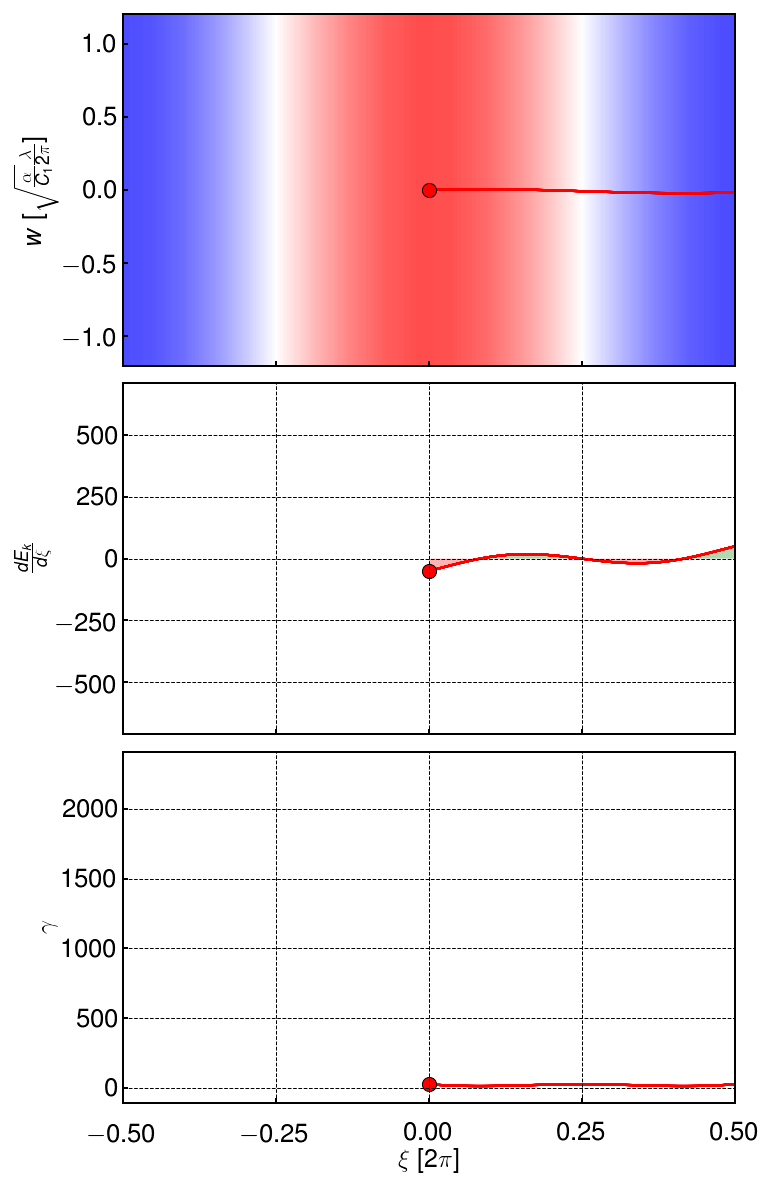

In [41]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=25.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(-1.5,31.5,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)

length_x = 1.0

for n_snap in range(0, 20000, 20001):


        start_x = -0.5+(t[-1]-t[-2])*n_snap/2/np.pi


        ax=plt.subplot(3,1,1)
        #### manifesting colorbar, changing label and axis properties ####
        #cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
        #cbar.set_label('Normalized electric field',fontdict=font)        
        plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
        plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,w[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
        plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
        plt.ylim(-1.025,1.025)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')


        ax=plt.subplot(3,1,2)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,w,'r-',label='w(t)')
        n_min=0 # 104999 #99999# 74999 #35000
        n_max=299999 # 124999 #5000 #399999
        x1=t[n_min:n_max]/2/np.pi
        y1=d_work[n_min:n_max]
        y2=np.zeros_like(x1)
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        #ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
        ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
        ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
        #ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
        #plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,d_work[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=1); plt.yticks(fontsize=26);
        plt.ylim(-709.9,709.9)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')

        ax=plt.subplot(3,1,3)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
        plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,gamma[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\gamma$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=26); plt.yticks(fontsize=26);
        #plt.ylim(-1.1,1.1)
        plt.ylim(-109.0, 2409.0)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')


        #plt.show()
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05, wspace=0.35)
        fig = plt.gcf()
        fig.set_size_inches(10, 18)
        #fig.set_size_inches(5, 4.5)
        #fig.savefig('./series_1/series'+str(n_snap).zfill(3)+'.png',format='png',dpi=160)
        #plt.close("all")

In [54]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=25.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(-1.5,31.5,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)

length_x = 2.0

for n_snap in range(0, 200000, 20001):


        start_x = -1.0+(t[-1]-t[-2])*n_snap/2/np.pi


        ax=plt.subplot(2,2,1)
        #### manifesting colorbar, changing label and axis properties ####
        #cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
        #cbar.set_label('Normalized electric field',fontdict=font)        
        plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap=cm.bwr, alpha=.7)
        plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,w[n_min+n_snap], color='darkorchid', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
        plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
        #plt.ylim(0.825,1.025)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')


        ax=plt.subplot(2,2,2)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,w,'r-',label='w(t)')
        n_min=0 # 104999 #99999# 74999 #35000
        n_max=299999 # 124999 #5000 #399999
        x1=t[n_min:n_max]/2/np.pi
        y1=d_work[n_min:n_max]
        y2=np.zeros_like(x1)
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        #ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
        ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
        ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
        #ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
        #plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,d_work[n_min+n_snap], color='darkorchid', marker='o', s=200, edgecolors='k')
        #plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=1); plt.yticks(fontsize=26);
        plt.ylim(-709.9,709.9)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')

        ax=plt.subplot(2,2,3)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
        plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,gamma[n_min+n_snap], color='darkorchid', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\gamma$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=26); plt.yticks(fontsize=26);
        #plt.ylim(-1.1,1.1)
        plt.ylim(-109.0, 2409.0)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        plt.legend(loc='best')

        
        ax=plt.subplot(2,2,4)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(px,py,'g-',label=r'$p_x-p_y$')
        p_py = np.linspace(-95.0,95.0,401)
        p_px = np.linspace(-50.0,250.0,601)

        [p_px,p_py] = np.meshgrid(p_px,p_py)

        p_R = (1+p_px**2+p_py**2)**0.5-p_px
        levels = np.linspace(np.min(p_R), np.max(p_R), 32)
        plt.contour(p_px, p_py, p_R, np.array([25.0]),linestyles='dashed',linewidth=0.5, alpha=0.35)
        #plt.scatter(px2[n_min2:n_max2],py2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
        plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
        plt.scatter(px[n_min+n_snap],py[n_min+n_snap], color='darkorchid', marker='o', s=200, edgecolors='k')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        #plt.scatter(px1[n_min:n_max],py1[n_min:n_max], s=3, color='k', edgecolors='None')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))

        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        plt.xlabel(r'$p_x\ [m_ec]$',fontdict=font)
        plt.ylabel(r'$p_y\ [m_ec]$',fontdict=font)
        plt.xticks(fontsize=30); plt.yticks(fontsize=30);
        #plt.ylim(-1.1,1.1)
        plt.legend(loc='best')

        #plt.show()
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.15, right=0.95, hspace=0.05, wspace=0.30)
        fig = plt.gcf()
        fig.set_size_inches(18, 12)
        #fig.set_size_inches(5, 4.5)
        #fig.savefig('./series_1/series'+str(n_snap).zfill(3)+'.png',format='png',dpi=160)
        plt.close("all")

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


This is 00000 of 20000


/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


This is 00500 of 20000
This is 01000 of 20000
This is 01500 of 20000
This is 02000 of 20000


KeyboardInterrupt: 

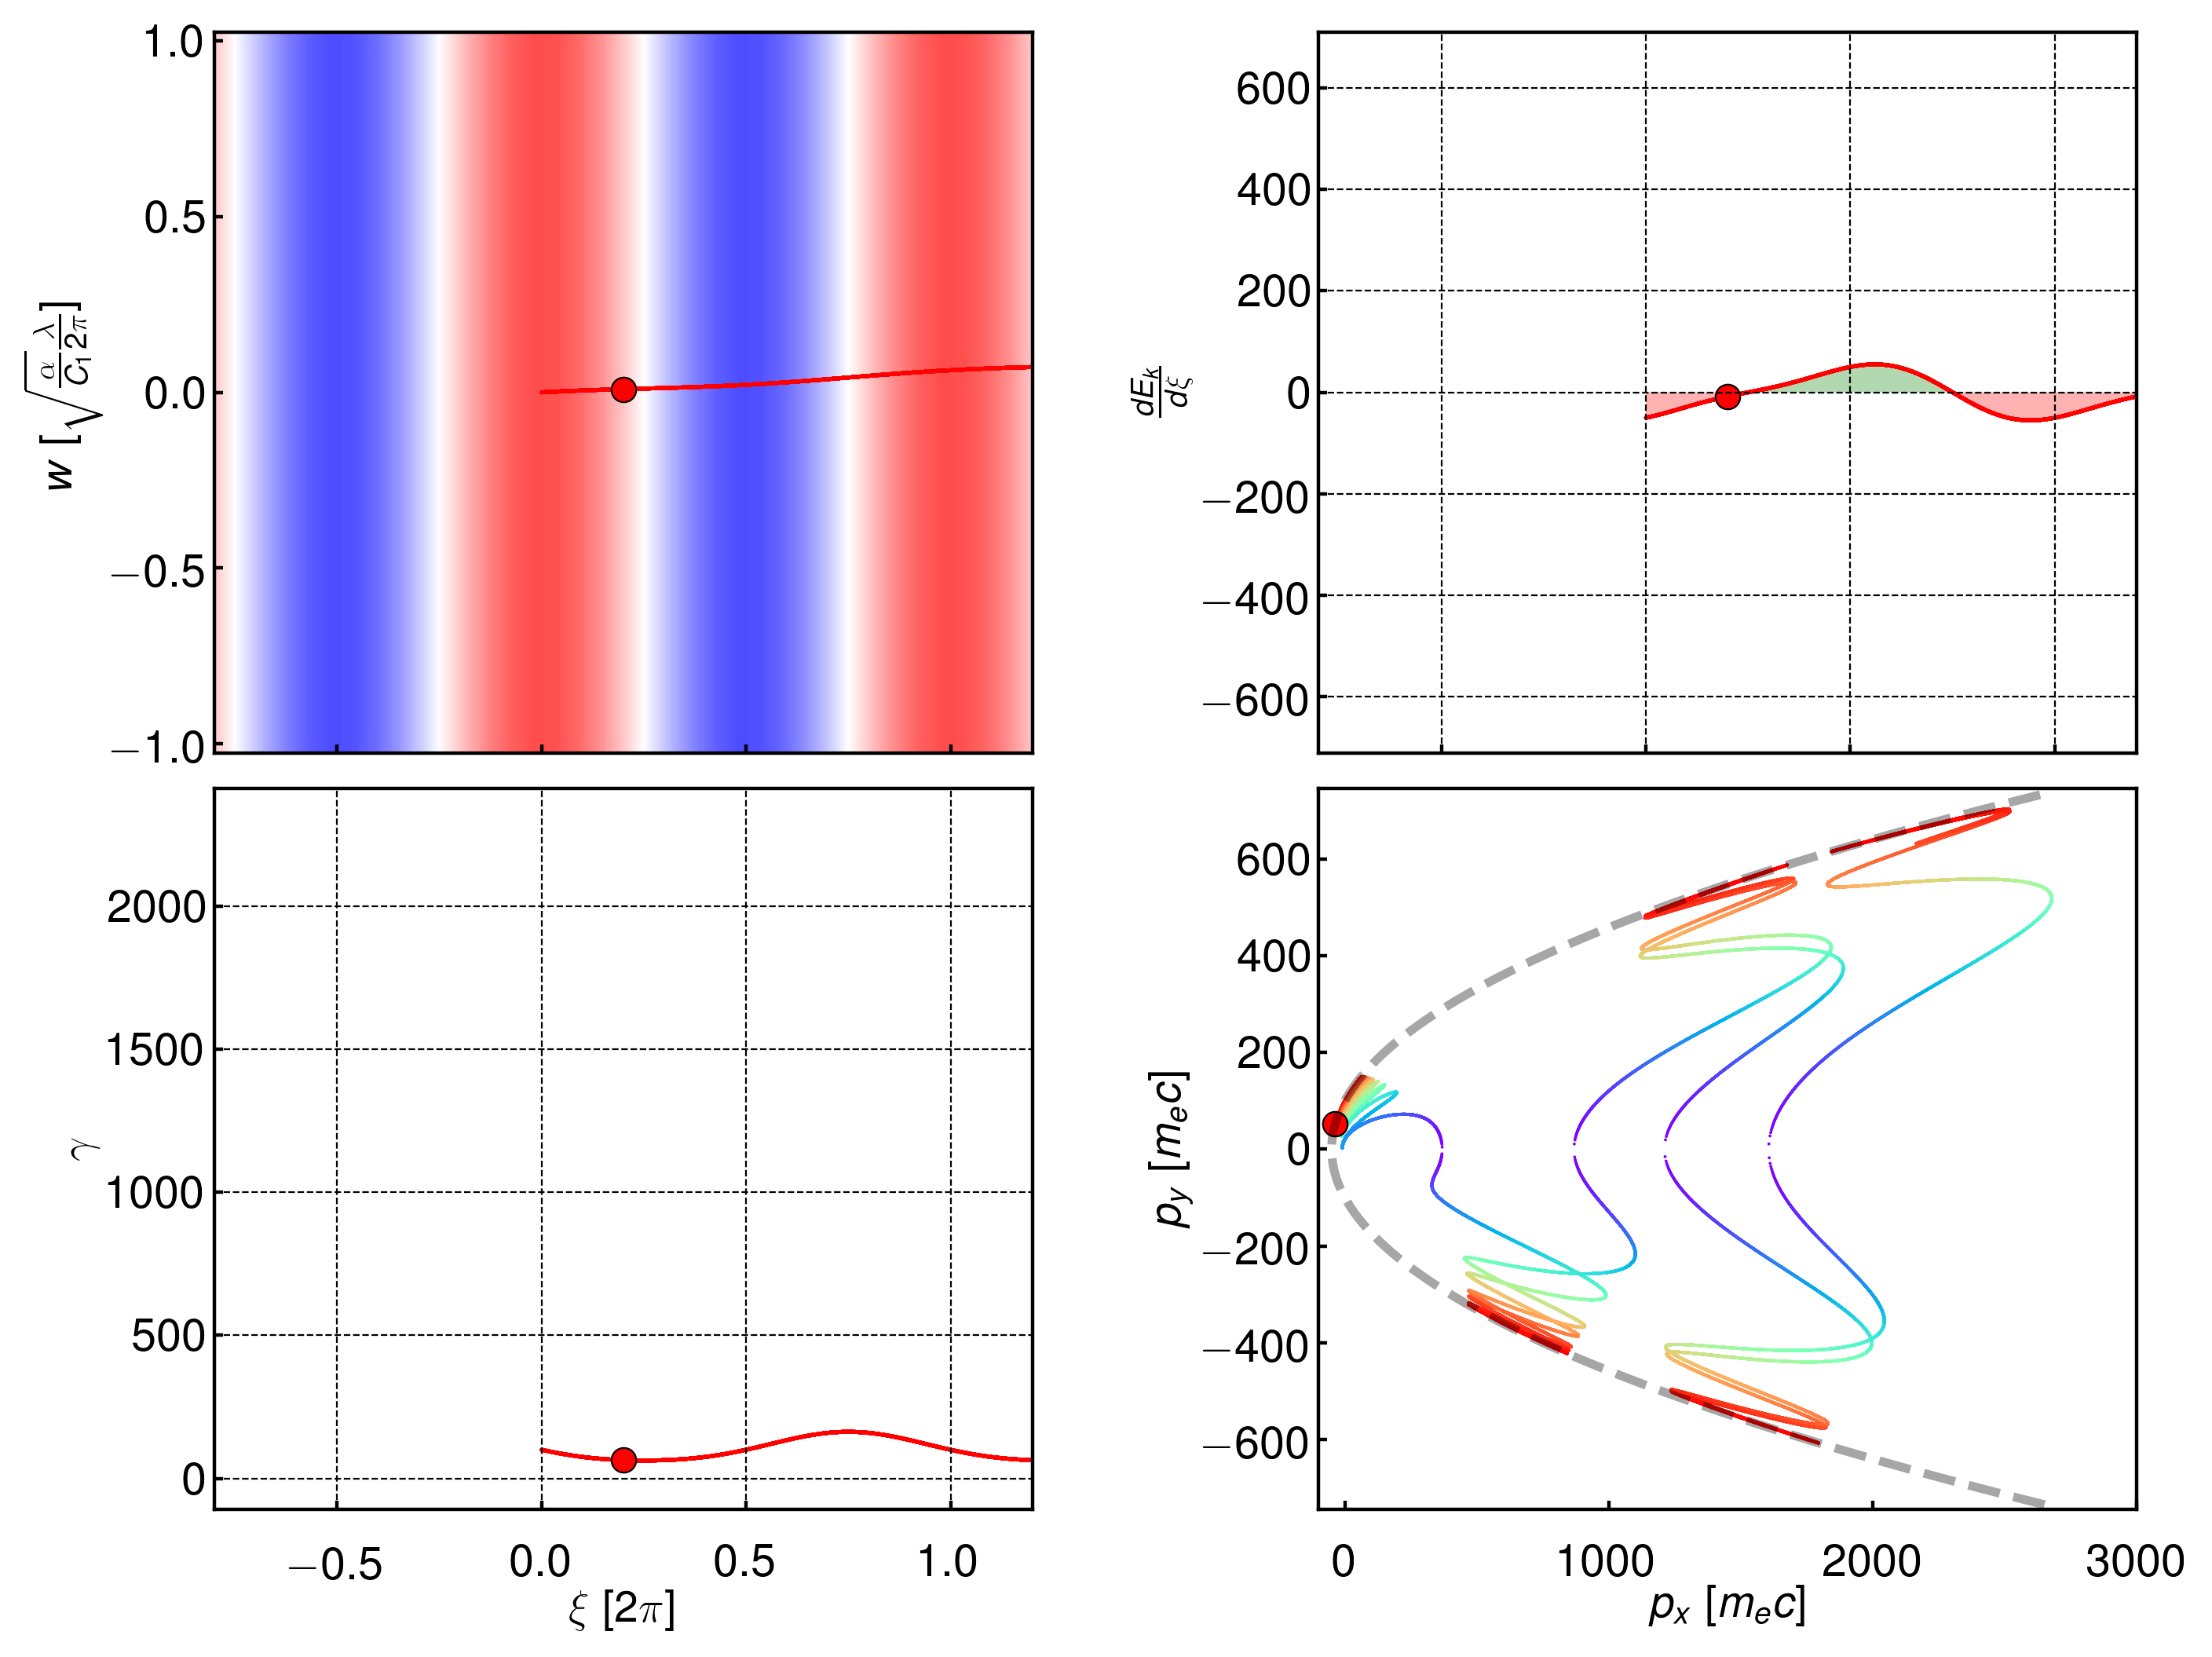

In [59]:
from scipy.integrate import odeint
%matplotlib inline
#import sdf
import matplotlib
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 25,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# function that returns dz/dt
def model(z,t,a0):
    u = z[0]
    w = z[1]
    dudt = (alpha**0.5/(C1**1.5))/(1-w**2)*a0+w*u**2/(1-w**2)-(alpha/(C1**3))*w/(1-w**2)**3+(alpha/C1)*w/(1-w**2)#(-x + u)/2.0
    dwdt = u#(-y + x)/5.0
    dzdt = [dudt,dwdt]
    return dzdt

# initial condition
P0=100.0
alpha=0.01
C1=(P0**2+1.0)**0.5
#z0 = [0,0]
z0 = [(alpha/C1)**0.5,0]

# number of time points
nsteps=300000

# time points
t = np.linspace(0,30*2*np.pi,nsteps)

# step input laser a0
a0 = -50.0*np.cos(t)

# store solution
u = np.empty_like(t)
w = np.empty_like(t)
# record initial conditions
u[0] = z0[0]
w[0] = z0[1]

# solve ODE
for i in range(1,nsteps):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(a0[i],))
    # store solution for plotting
    u[i] = z[1][0]
    w[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

R=C1-alpha*w**2*C1/alpha    
py=u*R*(C1/alpha)**0.5

gamma=(1+py**2+R**2)/2/R
px=gamma-R
q=w*(C1/alpha)**0.5

d_work=py/R*a0

term1=alpha*q*(py/R)**2/R
term2=-alpha*q/R**3
term3=alpha*q/R
term4=a0/R

n_min=0 # 104999 #99999# 74999 #35000
n_max=299999 # 124999 #5000 #399999
lgR=R[n_min:n_max]
#lgR=np.log10(R[n_min:n_max])
# plot results

x_grid = np.linspace(-1.5,31.5,601)
y_grid = np.linspace(-1.2,1.2,201)

[x_grid,y_grid] = np.meshgrid(x_grid,y_grid)
Ey = np.cos(2*np.pi*x_grid)

eee=np.max([-np.min(Ey),np.max(Ey)])
levels = np.linspace(-eee, eee, 128)

length_x = 2.0

for n_snap in range(0, 50000, 500):
        print('This is '+str(n_snap).zfill(5)+' of '+str(20000))
        start_x = -1.0+(t[-1]-t[-2])*n_snap/2/np.pi
        ax=plt.subplot(2,2,1)
        #### manifesting colorbar, changing label and axis properties ####
        #cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
        #cbar.set_label('Normalized electric field',fontdict=font)        
        plt.contourf(x_grid, y_grid, Ey, levels=levels, cmap='bwr', alpha=.7)
        #cbar=plt.colorbar(ticks=[-eee, -eee/2, 0, eee/2, eee])
        #cbar.set_label('Normalized electric field',fontdict=font)
        plt.scatter(t[n_min:n_max]/2/np.pi,w[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        plt.scatter(t[n_min+n_snap]/2/np.pi,w[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        #plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$w\ [\sqrt{\frac{\alpha}{C_1}}\frac{\lambda}{2\pi}]$',fontdict=font)
        plt.xticks(fontsize=1.0); plt.yticks(fontsize=26);
        plt.ylim(-1.025,1.025)
        plt.xlim(start_x,start_x+length_x)
        #plt.legend(loc='best')


        ax=plt.subplot(2,2,2)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,w,'r-',label='w(t)')
        #n_min=0 # 104999 #99999# 74999 #35000
        #n_max=299999 # 124999 #5000 #399999
        x1=t[n_min:n_max]/2/np.pi
        y1=d_work[n_min:n_max]
        y2=np.zeros_like(x1)
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        #ax.fill_between(x1, 0, 1, where=abs(x1-11.5)<0.25 , facecolor='cyan', alpha=0.2, transform=trans)
        ax.fill_between(x1,y1,y2,where=y1>= y2, facecolor='green', alpha=0.3, interpolate=True)
        ax.fill_between(x1,y1,y2,where=y1<= y2, facecolor='red', alpha=0.3, interpolate=True)
        #ax.fill(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], 'b', alpha=0.3)
        #plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=1, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,d_work[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot(t[n_min:n_max]/2/np.pi,d_work[n_min:n_max],'-k',linewidth=2)
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$log_{10}R$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        #plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\frac{dE_k}{d\xi}$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=1); plt.yticks(fontsize=26);
        plt.ylim(-709.9,709.9)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        #plt.legend(loc='best')

        ax=plt.subplot(2,2,3)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(t/2/np.pi,gamma,'k-',label=r'$\gamma$')
        plt.scatter(t[n_min:n_max]/2/np.pi,gamma[n_min:n_max], c=lgR, s=5, cmap='rainbow', edgecolors='None')
        plt.scatter(t[n_min+n_snap]/2/np.pi,gamma[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))
        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel(r'$\xi\ [2\pi]$',fontdict=font)
        plt.ylabel(r'$\gamma$',fontdict=font)
        plt.grid(color='k', linestyle='--', linewidth=1)
        plt.xticks(fontsize=26); plt.yticks(fontsize=26);
        #plt.ylim(-1.1,1.1)
        plt.ylim(-109.0, 2409.0)
        #plt.xlim(11.0,12.0)
        plt.xlim(start_x,start_x+length_x)
        #plt.legend(loc='best')

        
        ax=plt.subplot(2,2,4)
        #plt.plot(t,a0,'g:',label=r'$a_0(t)$')
        #plt.plot(t,u,'b-',label='u(t)')
        #plt.plot(px,py,'g-',label=r'$p_x-p_y$')
        p_py = np.linspace(-750.0,750.0,401)
        p_px = np.linspace(-50.0,2650.0,601)

        [p_px,p_py] = np.meshgrid(p_px,p_py)

        p_R = (1+p_px**2+p_py**2)**0.5-p_px
        #levels = np.linspace(np.min(p_R), np.max(p_R), 32)
        plt.contour(p_px, p_py, p_R, np.array([100.0]),linestyles='dashed',linewidth=0.5, alpha=0.35)
        #plt.scatter(px2[n_min2:n_max2],py2[n_min2:n_max2], c=lgR2, s=3, cmap='plasma_r', edgecolors='None')
        plt.scatter(px[n_min:n_max],py[n_min:n_max], c=lgR, s=3, cmap='rainbow', edgecolors='None')
        plt.scatter(px[n_min+n_snap],py[n_min+n_snap], color='r', marker='o', s=200, edgecolors='k')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(lgR), np.max(lgR), 5))
        #cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        #plt.scatter(px1[n_min:n_max],py1[n_min:n_max], s=3, color='k', edgecolors='None')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #cbar=plt.colorbar(ticks=np.linspace(np.min(gamma), np.max(gamma), 5))

        #cbar.set_label(r'$\gamma$', fontdict=font)#plt.xlim(47,53)
        plt.xlabel(r'$p_x\ [m_ec]$',fontdict=font)
        plt.ylabel(r'$p_y\ [m_ec]$',fontdict=font)
        plt.xticks(fontsize=26); plt.yticks(fontsize=26);
        plt.ylim(-745.0,745.0)
        plt.xlim(-99.0,2999.0)
        #plt.legend(loc='best')

        #plt.show()
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05, wspace=0.35)
        fig = plt.gcf()
        fig.set_size_inches(18, 14)
        #fig.set_size_inches(5, 4.5)
        fig.savefig('./wrap/series_MD/series'+str(n_snap).zfill(6)+'.png',format='png',dpi=160)
        plt.close("all")